In [40]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score, KFold, cross_validate, train_test_split
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from scipy.stats import kurtosis
from sklearn import random_projection
from scipy.linalg import pinv
from sklearn.feature_selection import RFECV
from sklearn.svm import SVR
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.manifold import TSNE
from collections import Counter
import io

In [41]:
#load data
df = pd.read_csv(r'NASP_Public.csv')

In [42]:
extracted_col_1 = df.iloc[:,1]
extracted_col_2 = df.iloc[:,2]
extracted_col_3 = df.iloc[:,102]
extracted_col_4 = df.iloc[:,103]

In [43]:
df_is_null = pd.DataFrame(index=['0'], columns = df.columns)

for i in range(df.shape[1]):
    df_is_null.iat[0,i] = df.iloc[:,i].isnull().sum()

df_is_null = df_is_null.loc[:, (df_is_null != 0).any(axis=0)]
df_is_null

,Legal or Illegal,notes
0,45,733


In [44]:
total_state_number = len(Counter(df['state']).keys())
num_data = df
num_data.drop(num_data.columns[1], axis=1, inplace=True)
num_data.drop(num_data.columns[1], axis=1, inplace=True)
num_data.drop(num_data.columns[100], axis=1, inplace=True)
num_data.drop(num_data.columns[100], axis=1, inplace=True)

In [45]:
num_data = num_data.groupby('state').apply(lambda group: group.interpolate(method='linear', limit_direction='both'))

In [46]:
num_data.fillna(0, inplace=True)

In [47]:
num_data

,state,pregnancyratelt15,pregnancyrate1517,pregnancyrate1819,pregnancyrate1519,pregnancyratelt20,pregnancyrate2024,pregnancyrate2529,pregnancyrate3034,pregnancyrate3539,...,population40plus,population1544,abortionstotal,birthstotal,pregnancyratetotal,birthratetotal,abortionratetotal,abortionratiototal,miscarriagestotal,pregnanciestotal
0,AL,21.3,78.3,155.7,110.5,114.3,186.5,152.5,87.2,31.9,...,132391,945017,20100,60745,100.5,64.3,21.3,330.9,14160,95000
1,AL,23.6,76.3,173.4,116.4,120.9,184.2,155.0,87.2,32.0,...,152130,963462,17720,62260,97.8,64.6,18.4,284.6,14220,94200
2,AL,18.5,66.2,156.2,102.4,106.0,176.6,143.2,90.5,34.6,...,167319,979413,14940,60488,90.9,61.8,15.3,247.0,13590,89020
3,AL,11.9,53.7,140.8,89.8,92.1,186.8,158.7,96.1,37.6,...,177209,970239,13060,63299,93.1,65.2,13.5,206.3,13970,90320
4,AL,8.7,38.6,118.7,70.8,72.5,165.8,154.8,100.5,40.7,...,173653,950989,10840,60453,88.8,63.6,11.4,179.3,13170,84470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,WY,4.0,18.7,75.6,41.9,42.2,140.0,167.5,113.5,49.1,...,16261,110156,820,7644,91.5,69.4,7.5,107.5,1610,10080
908,WY,4.0,17.6,82.3,43.2,43.6,138.7,169.2,116.3,51.5,...,16099,109953,850,7696,92.5,70.0,7.7,110.5,1620,10170
909,WY,4.0,14.4,79.7,40.1,40.6,140.3,164.1,121.3,54.6,...,15984,110164,810,7765,92.7,70.5,7.3,104.1,1630,10210
910,WY,4.0,13.7,72.1,36.7,37.3,125.6,159.2,123.6,53.0,...,15839,109474,770,7386,88.7,67.5,7.0,103.7,1550,9710


In [48]:
# Check if the interpolated data still has any missing values
num_data_is_null = pd.DataFrame(index=['0'], columns = num_data.columns)

for i in range(num_data.shape[1]):
    num_data_is_null.iat[0,i] = num_data.iloc[:,i].isnull().sum()

num_data_is_null = num_data_is_null.loc[:, (num_data_is_null != 0).any(axis=0)]
num_data_is_null

""
0


In [49]:
num_data.insert(1, "year", extracted_col_1)
num_data.insert(2, "Legal or Illegal", extracted_col_2)

In [51]:
num_data

,state,year,Legal or Illegal,pregnancyratelt15,pregnancyrate1517,pregnancyrate1819,pregnancyrate1519,pregnancyratelt20,pregnancyrate2024,pregnancyrate2529,...,population40plus,population1544,abortionstotal,birthstotal,pregnancyratetotal,birthratetotal,abortionratetotal,abortionratiototal,miscarriagestotal,pregnanciestotal
0,AL,1988,Illegal,21.3,78.3,155.7,110.5,114.3,186.5,152.5,...,132391,945017,20100,60745,100.5,64.3,21.3,330.9,14160,95000
1,AL,1992,Illegal,23.6,76.3,173.4,116.4,120.9,184.2,155.0,...,152130,963462,17720,62260,97.8,64.6,18.4,284.6,14220,94200
2,AL,1996,Illegal,18.5,66.2,156.2,102.4,106.0,176.6,143.2,...,167319,979413,14940,60488,90.9,61.8,15.3,247.0,13590,89020
3,AL,2000,Illegal,11.9,53.7,140.8,89.8,92.1,186.8,158.7,...,177209,970239,13060,63299,93.1,65.2,13.5,206.3,13970,90320
4,AL,2005,Illegal,8.7,38.6,118.7,70.8,72.5,165.8,154.8,...,173653,950989,10840,60453,88.8,63.6,11.4,179.3,13170,84470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,WY,2013,legal,4.0,18.7,75.6,41.9,42.2,140.0,167.5,...,16261,110156,820,7644,91.5,69.4,7.5,107.5,1610,10080
908,WY,2014,legal,4.0,17.6,82.3,43.2,43.6,138.7,169.2,...,16099,109953,850,7696,92.5,70.0,7.7,110.5,1620,10170
909,WY,2015,legal,4.0,14.4,79.7,40.1,40.6,140.3,164.1,...,15984,110164,810,7765,92.7,70.5,7.3,104.1,1630,10210
910,WY,2016,legal,4.0,13.7,72.1,36.7,37.3,125.6,159.2,...,15839,109474,770,7386,88.7,67.5,7.0,103.7,1550,9710


In [52]:
# Cleaning data
df = num_data
df = df.loc[df['state'] != 'US']
df['Legal or Illegal'] = df['Legal or Illegal'].replace('(?i)illegal', '0', regex=True)
df['Legal or Illegal'] = df['Legal or Illegal'].replace('(?i)legal', '1', regex=True)

C:\Users\minig\AppData\Local\Temp/ipykernel_37868/3534755573.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Legal or Illegal'] = df['Legal or Illegal'].replace('(?i)illegal', '0', regex=True)
C:\Users\minig\AppData\Local\Temp/ipykernel_37868/3534755573.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Legal or Illegal'] = df['Legal or Illegal'].replace('(?i)legal', '1', regex=True)


In [54]:
dict_State = {'AL' : 1, 'AK' : 2, 'AZ' : 3,'AR' : 4, 'CA' : 5, 'CO' : 6,'CT' :7, 'DE' : 8, 'DC' : 9, 'FL' : 10,
              'GA' : 11, 'HI' : 12, 'ID' : 13, 'IL' : 14, 'IN' : 15, 'IA' : 16, 'KS' : 17, 'KY' : 18, 'LA' : 19,
              'ME' : 20, 'MD' : 21, 'MA' : 22, 'MI' : 23, 'MN' : 24, 'MS' : 25, 'MO' : 26, 'MT' : 27, 'NE' : 28, 
              'NV' : 29, 'NH' : 30, 'NJ' : 31, 'NM' : 32, 'NY' : 33, 'NC' : 34, 'ND' : 35, 'OH' : 36, 'OK' : 37,
              'OR' : 38, 'PA' : 39, 'RI' : 40, 'SC' : 41, 'SD' : 42, 'TN' : 43, 'TX' : 44, 'UT' : 45, 'VT' : 46,
              'VA' : 47, 'WA' : 48, 'WV' : 49, 'WI' : 50, 'WY' : 51}

In [56]:
df["state"]=df["state"].replace(dict_State)

C:\Users\minig\AppData\Local\Temp/ipykernel_37868/3271979203.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["state"]=df["state"].replace(dict_State)


In [57]:
df.head()

,state,year,Legal or Illegal,pregnancyratelt15,pregnancyrate1517,pregnancyrate1819,pregnancyrate1519,pregnancyratelt20,pregnancyrate2024,pregnancyrate2529,...,population40plus,population1544,abortionstotal,birthstotal,pregnancyratetotal,birthratetotal,abortionratetotal,abortionratiototal,miscarriagestotal,pregnanciestotal
0,1,1988,0,21.3,78.3,155.7,110.5,114.3,186.5,152.5,...,132391,945017,20100,60745,100.5,64.3,21.3,330.9,14160,95000
1,1,1992,0,23.6,76.3,173.4,116.4,120.9,184.2,155.0,...,152130,963462,17720,62260,97.8,64.6,18.4,284.6,14220,94200
2,1,1996,0,18.5,66.2,156.2,102.4,106.0,176.6,143.2,...,167319,979413,14940,60488,90.9,61.8,15.3,247.0,13590,89020
3,1,2000,0,11.9,53.7,140.8,89.8,92.1,186.8,158.7,...,177209,970239,13060,63299,93.1,65.2,13.5,206.3,13970,90320
4,1,2005,0,8.7,38.6,118.7,70.8,72.5,165.8,154.8,...,173653,950989,10840,60453,88.8,63.6,11.4,179.3,13170,84470


In [58]:
y = df.pop('Legal or Illegal')
#scale features
X_scaled = preprocessing.scale(df)

#split train and test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

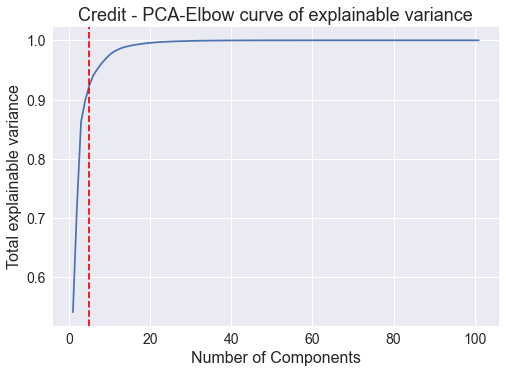

(693, 7)

In [59]:
#PCA
n_features = X_train.shape[1]
total_explained_variance = []
pca = PCA(n_components = n_features, random_state = 10)
X_reduced = pca.fit_transform(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)

plt.style.use('seaborn')
plt.plot(range(1,n_features+1),cumsum)
plt.xlabel('Number of Components', fontsize = 16)
plt.ylabel('Total explainable variance', fontsize = 16)
#plt.legend(fontsize=16)
plt.title('Credit - PCA-Elbow curve of explainable variance', fontsize = 18)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
#plt.ylim(20000,35000)
plt.axvline(x=5,color='r', linestyle='--')
plt.show()

pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)
X_reduced.shape

[33423.58217664163]
[33423.58217664163, 25277.386032351955]
[33423.58217664163, 25277.386032351955, 20400.36132310214]
[33423.58217664163, 25277.386032351955, 20400.36132310214, 16577.729183934567]
[33423.58217664163, 25277.386032351955, 20400.36132310214, 16577.729183934567, 14078.511801055389]
[33423.58217664163, 25277.386032351955, 20400.36132310214, 16577.729183934567, 14078.511801055389, 12379.858736426248]
[33423.58217664163, 25277.386032351955, 20400.36132310214, 16577.729183934567, 14078.511801055389, 12379.858736426248, 11230.595377907417]
[33423.58217664163, 25277.386032351955, 20400.36132310214, 16577.729183934567, 14078.511801055389, 12379.858736426248, 11230.595377907417, 10190.895999285658]
[33423.58217664163, 25277.386032351955, 20400.36132310214, 16577.729183934567, 14078.511801055389, 12379.858736426248, 11230.595377907417, 10190.895999285658, 9088.39926932703]
[33423.58217664163, 25277.386032351955, 20400.36132310214, 16577.729183934567, 14078.511801055389, 12379.8587

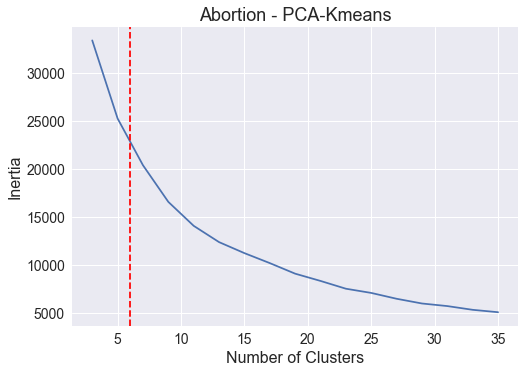

In [82]:
#find best kmeans on pca data using elbow method
cluster_range = [3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,33,35]
#mean squared distance between each instance and its closest centroid. Also called inertia
msd = []
for num_cluster in cluster_range:
    c = KMeans(n_clusters=num_cluster, random_state=1)
    #apply kmeans on pca data
    c_labels = c.fit(X_reduced)
    msd.append(c.inertia_)
    print(msd)
plt.style.use('seaborn')
plt.plot([3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,33,35],msd)
plt.xlabel('Number of Clusters', fontsize = 16)
plt.ylabel('Inertia', fontsize = 16)
plt.title('Abortion - PCA-Kmeans', fontsize = 18)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
plt.axvline(x=6,color='r', linestyle='--')
plt.show()

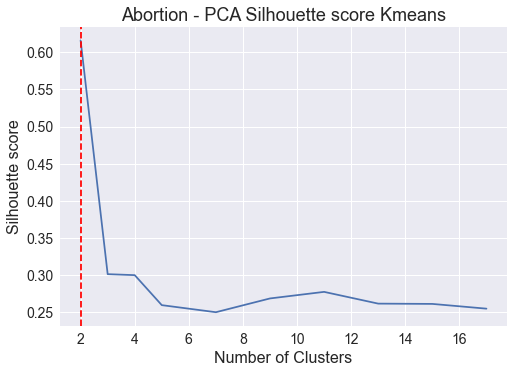

In [87]:
#find best kmeans on pca data using silhouette method
cluster_range = [2,3,4,5,7,9,11,13,15,17]
#mean squared distance between each instance and its closest centroid. Also called inertia
silhouette_list = []
for num_cluster in cluster_range:
    c = KMeans(n_clusters=num_cluster, random_state=10)
    c_labels = c.fit_predict(X_reduced)
    silhouette_list.append(silhouette_score(X_reduced, c_labels))
plt.style.use('seaborn')
plt.plot([2,3,4,5,7,9,11,13,15,17],silhouette_list)
plt.xlabel('Number of Clusters', fontsize = 16)
plt.ylabel('Silhouette score', fontsize = 16)
plt.title('Abortion - PCA Silhouette score Kmeans', fontsize = 18)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
plt.axvline(x=2,color='r', linestyle='--')
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.6161309679375588
For n_clusters = 3 The average silhouette_score is : 0.3010717265642295
For n_clusters = 4 The average silhouette_score is : 0.2997584856568024
For n_clusters = 5 The average silhouette_score is : 0.25932425363158335
For n_clusters = 6 The average silhouette_score is : 0.24545765827424723
For n_clusters = 7 The average silhouette_score is : 0.24979182702865138
For n_clusters = 8 The average silhouette_score is : 0.28025088317767777


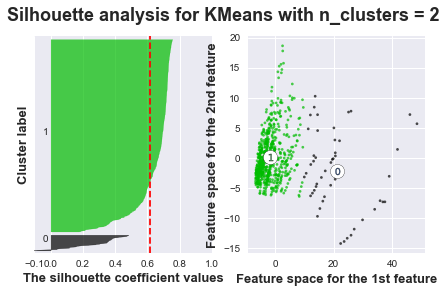

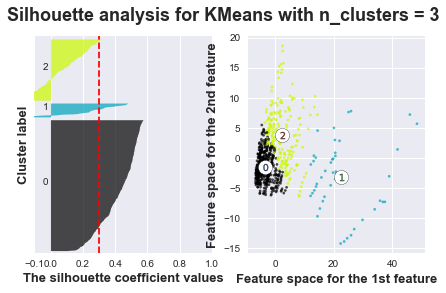

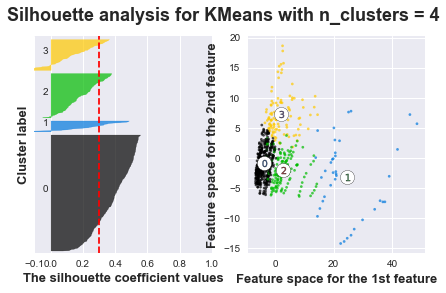

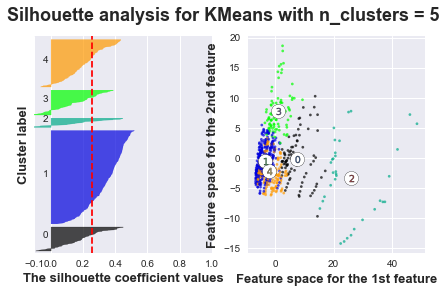

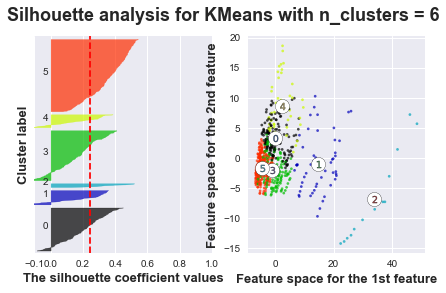

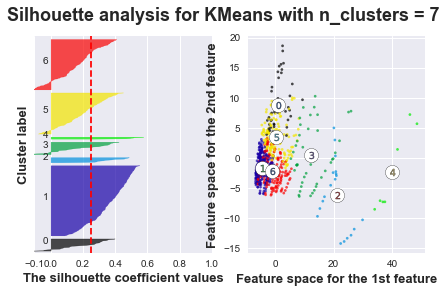

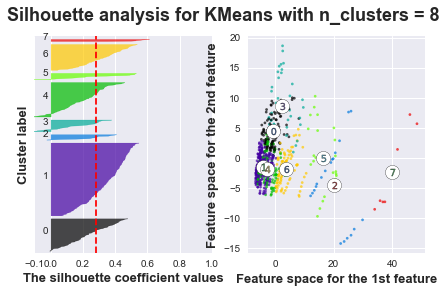

In [66]:
#https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
range_n_clusters = [2, 3, 4, 5, 6,7,8]
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(7, 4)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X_train) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X_reduced)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_reduced, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_reduced, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    #ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values",fontsize=13,fontweight='bold')
    ax1.set_ylabel("Cluster label",fontsize=13,fontweight='bold')

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X_reduced[:, 0], X_reduced[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    #ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature",fontsize=13,fontweight='bold')
    ax2.set_ylabel("Feature space for the 2nd feature",fontsize=13,fontweight='bold')

    plt.suptitle(("Silhouette analysis for KMeans "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=18, fontweight='bold')

plt.show()

In [67]:
#use 5 clusters based on above tests
kmeans = KMeans(n_clusters=4, random_state=10)
kmeans_labels = kmeans.fit(X_reduced)

In [68]:
def convert_numarr_to_df_pca (X_train,y_train,features):
    #convert back X_train to df for visulaization
    rows = X_train.shape[0]
    col_list = []
    #target = np.reshape(y_train.to_numpy(),(rows,1))
    target = np.reshape(y_train,(rows,1))
    X_train_vis = np.hstack((X_train,target))
    for i in range(1,features+1):
        col_list.append('component_' + str(i))
    #col_list = list(df.columns)
    col_list.append('quality')
    df_vis = pd.DataFrame(data=X_train_vis,    # values
            #index=data[1:,0],    # 1st column as index
            columns=col_list)
    return df_vis

In [69]:
df_vis_pca_credit = convert_numarr_to_df_pca(X_reduced,kmeans_labels.labels_,X_reduced.shape[1])

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 693 samples in 0.008s...
[t-SNE] Computed neighbors for 693 samples in 0.089s...
[t-SNE] Computed conditional probabilities for sample 693 / 693
[t-SNE] Mean sigma: 3.551616
[t-SNE] KL divergence after 250 iterations with early exaggeration: 51.891335
[t-SNE] KL divergence after 300 iterations: 0.297391


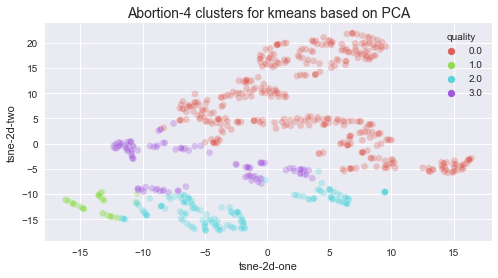

In [88]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300,random_state=10)
tsne_results = tsne.fit_transform(df_vis_pca_credit)

df_vis_pca_credit['tsne-2d-one'] = tsne_results[:,0]
df_vis_pca_credit['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(8,4))
sns.scatterplot(
    x="tsne-2d-one",
    y="tsne-2d-two",
    hue="quality",
    palette=sns.color_palette("hls", 4),
    data=df_vis_pca_credit,
    legend="full",
    alpha=0.3
)
plt.title('Abortion-4 clusters for kmeans based on PCA', fontsize = 14)
plt.show()

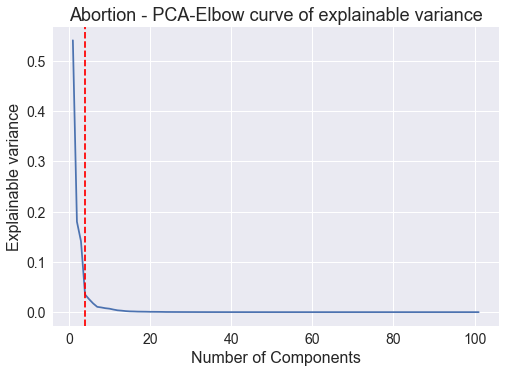

In [89]:
#run through PCA again since tsne adds new columns
#PCA
n_features = X_train.shape[1]
total_explained_variance = []
pca = PCA(n_components = n_features, random_state = 23)
X_reduced = pca.fit_transform(X_train)
ev = pca.explained_variance_ratio_

plt.style.use('seaborn')
plt.plot(range(1,n_features+1),ev)
plt.xlabel('Number of Components', fontsize = 16)
plt.ylabel('Explainable variance', fontsize = 16)
plt.title('Abortion - PCA-Elbow curve of explainable variance', fontsize = 18)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
plt.axvline(x=4,color='r', linestyle='--')
plt.show()

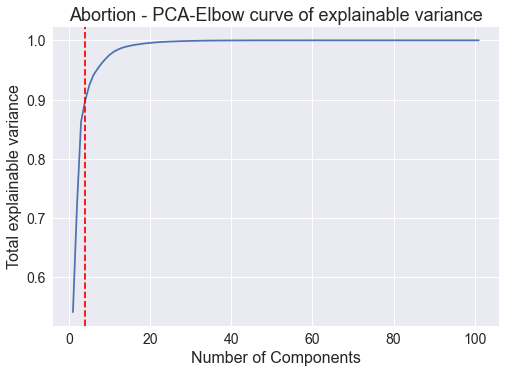

(693, 7)

In [90]:
#PCA
n_features = X_train.shape[1]
total_explained_variance = []
pca = PCA(n_components = n_features, random_state = 42)
X_reduced = pca.fit_transform(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)

plt.style.use('seaborn')
plt.plot(range(1,n_features+1),cumsum)
plt.xlabel('Number of Components', fontsize = 16)
plt.ylabel('Total explainable variance', fontsize = 16)
#plt.legend(fontsize=16)
plt.title('Abortion - PCA-Elbow curve of explainable variance', fontsize = 18)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
#plt.ylim(20000,35000)
plt.axvline(x=4,color='r', linestyle='--')
plt.show()

pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)
X_reduced.shape

AIC for n_clusters(2): [20850.127450979442]
BIC for n_clusters(2): [20981.81732095595]
AIC for n_clusters(3): [20850.127450979442, 20304.09506936145]
BIC for n_clusters(3): [20981.81732095595, 20503.900389325805]
AIC for n_clusters(5): [20850.127450979442, 20304.09506936145, 19693.239899967157]
BIC for n_clusters(5): [20981.81732095595, 20503.900389325805, 20029.27611990721]
AIC for n_clusters(7): [20850.127450979442, 20304.09506936145, 19693.239899967157, 19359.48856065379]
BIC for n_clusters(7): [20981.81732095595, 20503.900389325805, 20029.27611990721, 19831.75568056954]
AIC for n_clusters(9): [20850.127450979442, 20304.09506936145, 19693.239899967157, 19359.48856065379, 19119.42155563124]
BIC for n_clusters(9): [20981.81732095595, 20503.900389325805, 20029.27611990721, 19831.75568056954, 19727.919575522687]
AIC for n_clusters(11): [20850.127450979442, 20304.09506936145, 19693.239899967157, 19359.48856065379, 19119.42155563124, 18720.19290487736]
BIC for n_clusters(11): [20981.81732

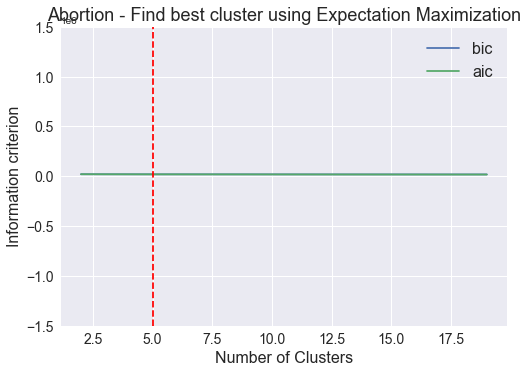

In [91]:
#Refer to last page which explains why AIC and BIC can be different.
#Basically more the number of clusters, more the number of gaussian distributions
#and more the number of parameters. Based on the increased number of parameters,
#bic is penalized which causes bic value to increase.
cluster_range = [2,3,5,7,9,11,13,15,17,19]
bic = []
aic = []
for num_cluster in cluster_range:
    gmm = GaussianMixture(covariance_type = 'diag', n_components = num_cluster, n_init = 10,random_state=1)
    c_labels = gmm.fit(X_reduced)
    bic.append(gmm.bic(X_reduced))
    aic.append(gmm.aic(X_reduced))
    print('AIC for n_clusters(%s): %s'%(num_cluster, aic))
    print('BIC for n_clusters(%s): %s'%(num_cluster, bic))
    
plt.style.use('seaborn')
plt.plot([2,3,5,7,9,11,13,15,17,19],bic,label = 'bic')
plt.plot([2,3,5,7,9,11,13,15,17,19],aic,label = 'aic')
plt.xlabel('Number of Clusters', fontsize = 16)
plt.ylabel('Information criterion', fontsize = 16)
plt.legend(fontsize=16)
plt.title('Abortion - Find best cluster using Expectation Maximization', fontsize = 18)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
plt.ylim(-1500000,1500000)
plt.axvline(x=5,color='r', linestyle='--')
plt.show()

In [75]:
gmm = GaussianMixture(covariance_type = 'diag', n_components = 5, n_init = 10,random_state=1)
gmm_c_labels = gmm.fit(X_reduced)

In [76]:
df_vis_gmm_pca_credit = convert_numarr_to_df_pca(X_reduced,gmm_c_labels.predict(X_reduced),X_reduced.shape[1])